In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [17]:
# Load the dataset
file_path = 'C:/Dataset/Warehouse_and_Retail_Sales CSV.csv'
df = pd.read_csv(file_path)

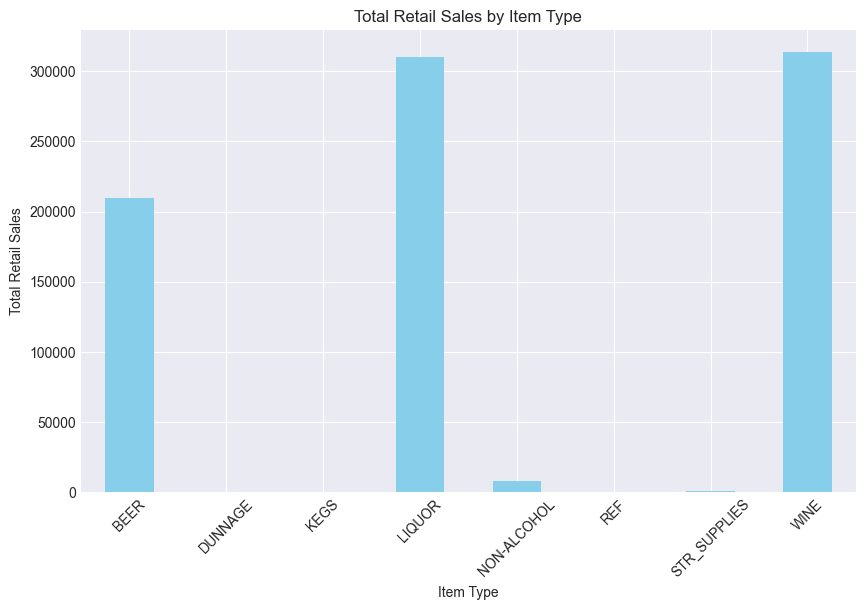

In [18]:
# Set up the plot style
plt.style.use('seaborn-v0_8-darkgrid')

# 1. Bar Plot - Total Retail Sales by Item Type
plt.figure(figsize=(10, 6))
df.groupby('ITEM TYPE')['RETAIL SALES'].sum().plot(kind='bar', color='skyblue')
plt.title('Total Retail Sales by Item Type')
plt.ylabel('Total Retail Sales')
plt.xlabel('Item Type')
plt.xticks(rotation=45)
plt.show()


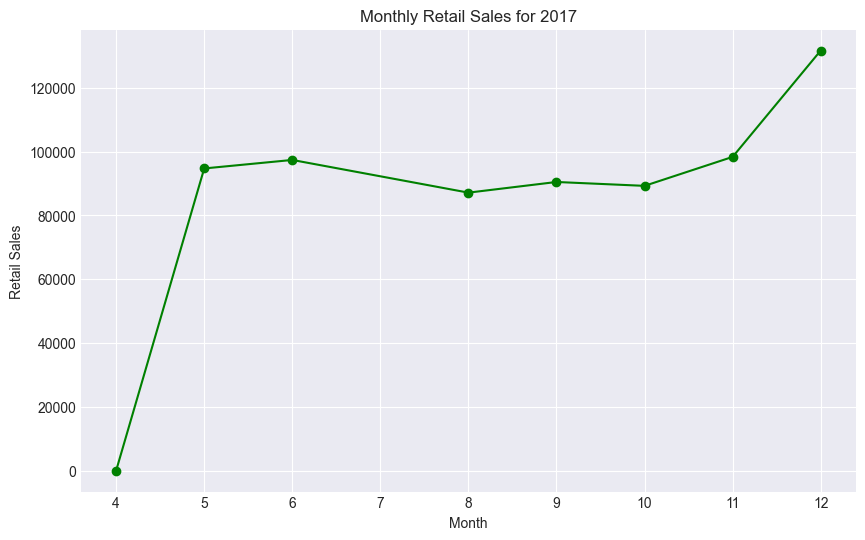

In [19]:
# 2. Line Plot - Monthly Retail Sales for a Specific Year
plt.figure(figsize=(10, 6))
df_2017 = df[df['YEAR'] == 2017]
monthly_sales = df_2017.groupby('MONTH')['RETAIL SALES'].sum()
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Retail Sales for 2017')
plt.ylabel('Retail Sales')
plt.xlabel('Month')
plt.show()


<Figure size 1000x600 with 0 Axes>

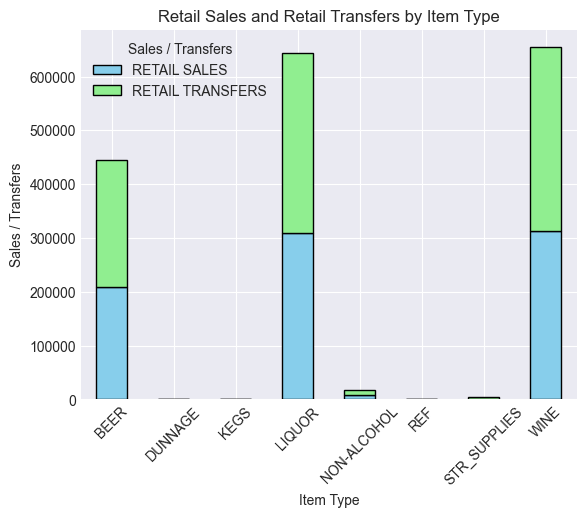

In [9]:
# 3. Stacked Bar Plot - Retail Sales and Retail Transfers by Item Type
plt.figure(figsize=(10, 6))
df_grouped = df.groupby('ITEM TYPE')[['RETAIL SALES', 'RETAIL TRANSFERS']].sum()
df_grouped.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'], edgecolor='black')
plt.title('Retail Sales and Retail Transfers by Item Type')
plt.ylabel('Sales / Transfers')
plt.xlabel('Item Type')
plt.xticks(rotation=45)
plt.legend(title='Sales / Transfers')
plt.show()


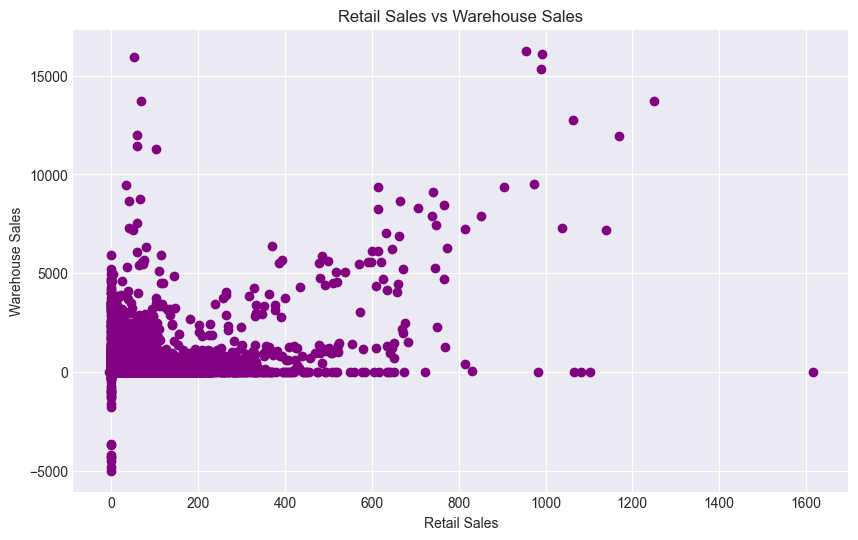

In [10]:
# 4. Scatter Plot - Retail Sales vs Warehouse Sales
plt.figure(figsize=(10, 6))
plt.scatter(df['RETAIL SALES'], df['WAREHOUSE SALES'], color='purple')
plt.title('Retail Sales vs Warehouse Sales')
plt.xlabel('Retail Sales')
plt.ylabel('Warehouse Sales')
plt.show()

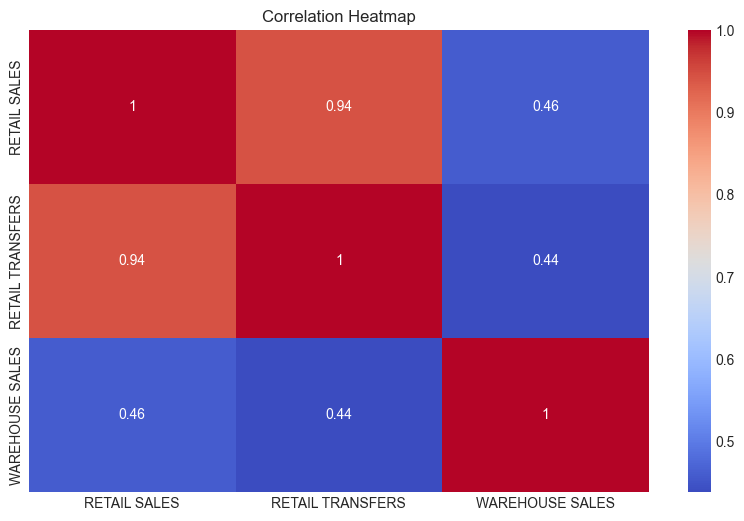

In [11]:
# 5. Heatmap - Correlation Between Numeric Columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [12]:
# Prepare the data - it will predict 'RETAIL SALES' based on 'RETAIL TRANSFERS' and 'WAREHOUSE SALES'
X = df[['RETAIL TRANSFERS', 'WAREHOUSE SALES']]  # Features
y = df['RETAIL SALES']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

In [14]:
# Calculate R² score for the accuracy of the model
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')


R² Score: 0.8462010254219333


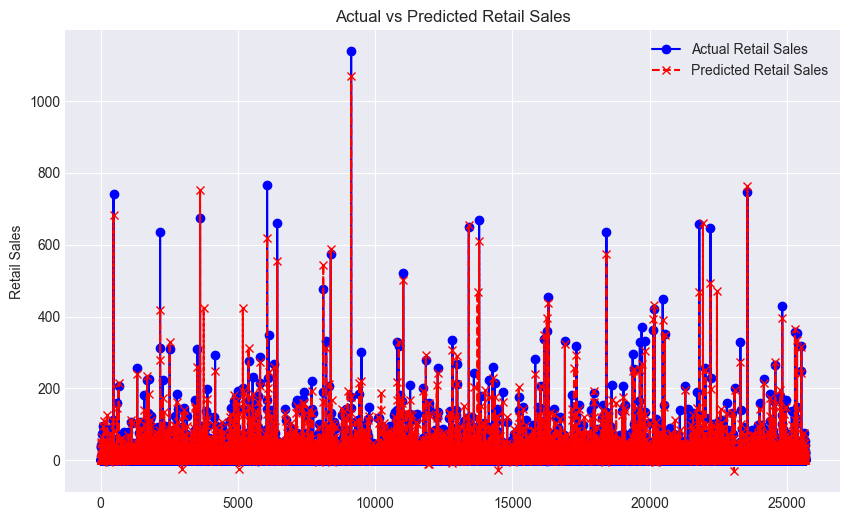

In [15]:
# Visualization - Actual vs Predicted Retail Sales
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Retail Sales', color='blue', marker='o')
plt.plot(y_pred, label='Predicted Retail Sales', color='red', linestyle='--', marker='x')
plt.title('Actual vs Predicted Retail Sales')
plt.ylabel('Retail Sales')
plt.legend()
plt.show()